# Voting for Competição ML @SBS/DAA - Edição 2023/2024

Goal: predict Injeção na rede (kWh)
- DecisionTree
- RandomForestTree
- SVMs

In [8]:
%store -r model_rft
%store -r model_dt
%store -r gscv_rfc
%store -r model_svm
%store -r model_log
%store -r data

In [9]:
from sklearn.model_selection import train_test_split
import pandas as pd

data_v = data.copy()
data_v.drop(['category','main_category','currency','deadline','goal','launched','country','continent','usd_goal_real','days_launched','launched_month'] ,axis=1,inplace=True)
X = data_v.drop(['state'],axis=1)
y = data_v['state'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=random)

In [10]:
from sklearn.ensemble import VotingClassifier
estimators = [('svm',model_svm),('dt',model_dt),('rft',model_rft),('gsv_rft',gscv_rfc),('log',model_log)]
vc=VotingClassifier(estimators,voting='soft',weights=[0.8,0.8,1.3,1.5,1])
vc.fit(X_train,y_train)

/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josebambora/miniconda3/envs/DAA/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('svm', SVC(probability=True, random_state=2021)),
                             ('dt', DecisionTreeClassifier(random_state=2021)),
                             ('rft', RandomForestClassifier(random_state=2021)),
                             ('gsv_rft',
                              GridSearchCV(cv=5,
                                           estimator=RandomForestClassifier(random_state=2021),
                                           param_grid={'max_depth': [None, 5,
                                                                     10, 15],
                                                       'min_samples_leaf': [1,
                                                                            3],
                                                       'min_samples_split': [2,
                                                                             5],
                                                       'n_estimators': [50, 100,
                                                                        200]},
                                           scoring='accuracy')),
                             ('log', LogisticRegression(random_state=2022))],
                 voting='soft', weights=[0.8, 0.8, 1.3, 1.5, 1])

In [11]:
predictions = vc.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, accuracy_score

import matplotlib.pyplot as plt
def stats_confusion_matrix(predictions,y_test):
    print("%0.2f accuracy" % (accuracy_score(y_test,predictions)))
    print(classification_report(y_test,predictions))
    ConfusionMatrixDisplay.from_predictions(y_test, predictions)
    plt.show()

0.82 accuracy
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       869
           1       0.78      0.78      0.78       631

    accuracy                           0.82      1500
   macro avg       0.81      0.81      0.81      1500
weighted avg       0.82      0.82      0.82      1500



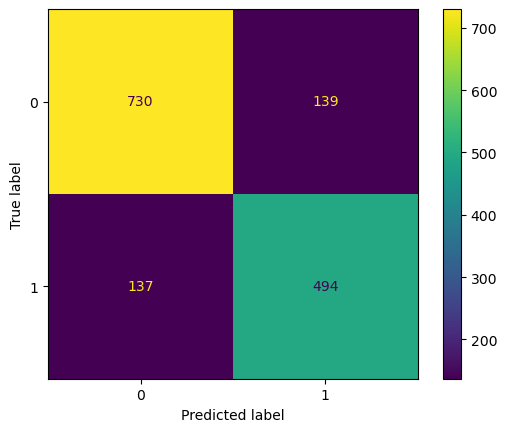

In [13]:
stats_confusion_matrix(predictions,y_test)